In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rc('lines', lw=2)  # Sets the line width
mpl.rcParams['grid.linewidth'] = 0.5  # Grid line width
mpl.rcParams['grid.linestyle'] = 'dashed'  # Grid line style
mpl.rc(('xtick', 'ytick'), labelsize=15)  # Axis tick label size
mpl.rc('font', family='Times New Roman', size=15)  # Font family and font size

In [3]:
path = r'C:\Users\paulo\Downloads\archive (2)\MiningProcess_Flotation_Plant_Database.csv'

In [4]:
df = pd.read_csv(path, decimal=',')

df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [6]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [ ]:
df = df[['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Silica Concentrate']]

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

X.shape, y.shape

((737453, 22), (737453, 1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
reg = xgb.XGBRegressor(n_estimators=1000,
                       early_stopping_rounds=50)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=50)


[0]	validation_0-rmse:0.88463	validation_1-rmse:0.88643
[50]	validation_0-rmse:0.33612	validation_1-rmse:0.33941
[100]	validation_0-rmse:0.26149	validation_1-rmse:0.26583
[150]	validation_0-rmse:0.22145	validation_1-rmse:0.22719
[200]	validation_0-rmse:0.19082	validation_1-rmse:0.19752
[250]	validation_0-rmse:0.16996	validation_1-rmse:0.17740
[300]	validation_0-rmse:0.15174	validation_1-rmse:0.16017
[350]	validation_0-rmse:0.14086	validation_1-rmse:0.15019
[400]	validation_0-rmse:0.12955	validation_1-rmse:0.13970
[450]	validation_0-rmse:0.12219	validation_1-rmse:0.13295
[500]	validation_0-rmse:0.11548	validation_1-rmse:0.12697
[550]	validation_0-rmse:0.11016	validation_1-rmse:0.12249
[600]	validation_0-rmse:0.10607	validation_1-rmse:0.11906
[650]	validation_0-rmse:0.10170	validation_1-rmse:0.11534
[700]	validation_0-rmse:0.09791	validation_1-rmse:0.11229
[750]	validation_0-rmse:0.09469	validation_1-rmse:0.10962
[800]	validation_0-rmse:0.09149	validation_1-rmse:0.10698
[850]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
y_pred = reg.predict(X_test)

print(mean_squared_error(y_test, y_pred))

0.009963176907380484


In [ ]:
results = reg.evals_result_
print(results.keys())

dict_keys(['validation_0', 'validation_1'])


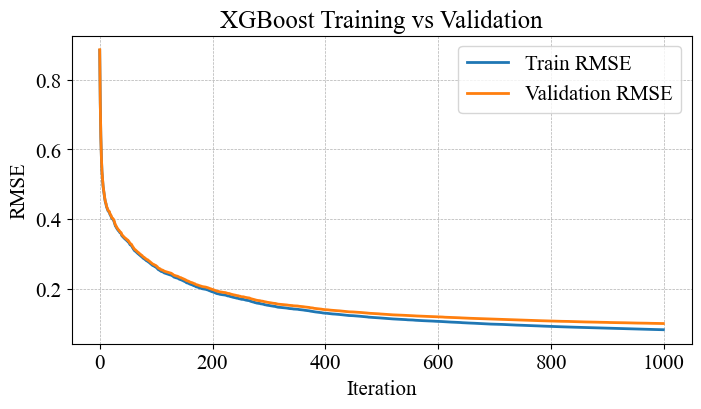

In [19]:
train_rmse = results['validation_0']['rmse']
val_rmse   = results['validation_1']['rmse']

plt.figure(figsize=(8, 4))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation')
plt.legend()
plt.grid(True)
plt.show()
